In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Step 2: Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [22]:
train_data
test_data

,upload_date,uploader_sub_count,view_count,like_count,dislike_count,has_subtitles,is_ads_enabled,is_comments_enabled,is_age_limit,is_live_content,description,title
0,20190724,2860,2869,39,2,False,False,True,False,False,Subscribe for more Videos\n___________________...,Enna kavi Padinallum - Sid Sriram - கண்ணில் நீ...
1,20210306,1470,190,3,0,False,False,True,False,False,#Leksione #Kontabilitet #Shqip\n\nHapja e kët...,SITUACIONET DHE RREGJISTRIMI I KONTRATAVE TE...
2,20160820,2660,944,91,0,False,False,True,False,False,TWD: DARYL & CAROL (!THE END GAME!)\n=========...,TWD: DARYL & CAROL (!THE END GAME!)
3,20130409,55,4772,15,3,False,True,True,False,False,NaN,رياض حسن ايلاما ايلاما
4,20170122,148,130,6,1,False,False,True,False,True,CS:GO будь в курсе кто папа),Дневной спантанный стрим!!!
...,...,...,...,...,...,...,...,...,...,...,...,...
337092,20160207,524000,30583,643,42,True,True,True,False,False,✦✦ ¡Únete al EJÉRCITO REDSHOCKIANO!: https://g...,✤ Smash Bros. Wii U ✤ | EXTRA: TODAS las ESCEN...
337093,20120529,3560000,794,0,0,True,True,True,False,False,제목 : TV소설 사랑아 사랑아(17부)\r\n공식홈페이지 : http://www....,"TV소설 사랑아 사랑아 - TV Novel Love, My Love 20120529..."
337094,20170106,647,8,0,0,False,False,True,False,False,NaN,One and Only
337095,ntly offline,320,0,0,0,False,False,False,False,False,If I stop drawing its because I have Teen Tita...,Personal animation VENT


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671277 entries, 0 to 671276
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   upload_date          671277 non-null  object
 1   uploader_sub_count   671277 non-null  int64 
 2   view_count           671277 non-null  int64 
 3   like_count           671277 non-null  int64 
 4   dislike_count        671277 non-null  int64 
 5   has_subtitles        671277 non-null  bool  
 6   is_ads_enabled       671277 non-null  bool  
 7   is_comments_enabled  671277 non-null  bool  
 8   is_age_limit         671277 non-null  bool  
 9   is_live_content      671277 non-null  bool  
 10  description          503648 non-null  object
 11  title                671270 non-null  object
dtypes: bool(5), int64(4), object(3)
memory usage: 39.1+ MB


In [24]:
# we drop the columns that are object and have no or little effect on the feture we want to predict

train_data = train_data.drop(columns=['upload_date','has_subtitles', 'is_ads_enabled', 'is_comments_enabled',
                                      'is_age_limit', 'is_live_content', 'description', 'title']).reset_index(drop=True)
test_data = test_data.drop(columns=['upload_date','has_subtitles', 'is_ads_enabled', 'is_comments_enabled',
                                      'is_age_limit', 'is_live_content', 'description', 'title']).reset_index(drop=True)


In [25]:
train_data.describe()

,uploader_sub_count,view_count,like_count,dislike_count
count,6.712770e+05,6.712770e+05,6.712770e+05,671277.000000
mean,1.206806e+05,1.766095e+04,2.552738e+02,13.944394
std,1.759403e+06,7.603635e+05,6.094604e+03,566.305097
min,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,3.700000e+01,3.300000e+01,1.000000e+00,0.000000
50%,2.880000e+02,1.510000e+02,4.000000e+00,0.000000
75%,2.610000e+03,9.690000e+02,2.000000e+01,1.000000
max,1.990000e+08,3.801310e+08,1.604419e+06,213772.000000


In [26]:
train_data =train_data[train_data['uploader_sub_count']>0]
test_data =test_data[test_data['uploader_sub_count']>0]

In [27]:
train_data.describe()

,uploader_sub_count,view_count,like_count,dislike_count
count,6.108420e+05,6.108420e+05,6.108420e+05,610842.000000
mean,1.326206e+05,1.801125e+04,2.626493e+02,13.981578
std,1.843956e+06,7.378642e+05,6.160590e+03,562.895530
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,7.500000e+01,3.400000e+01,1.000000e+00,0.000000
50%,3.840000e+02,1.520000e+02,4.000000e+00,0.000000
75%,3.440000e+03,9.840000e+02,1.900000e+01,1.000000
max,1.990000e+08,3.801310e+08,1.604419e+06,213772.000000


In [28]:
test_data.describe()

,uploader_sub_count,view_count,like_count,dislike_count
count,3.065050e+05,3.065050e+05,3.065050e+05,306505.000000
mean,1.364696e+05,1.865644e+04,2.930826e+02,15.287591
std,1.960395e+06,6.289698e+05,1.265272e+04,655.365175
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,7.600000e+01,3.400000e+01,1.000000e+00,0.000000
50%,3.830000e+02,1.530000e+02,4.000000e+00,0.000000
75%,3.430000e+03,9.830000e+02,1.900000e+01,1.000000
max,1.990000e+08,2.293691e+08,6.158496e+06,275574.000000


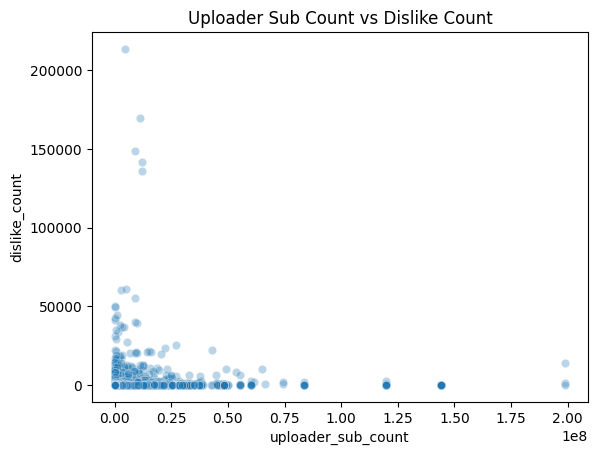

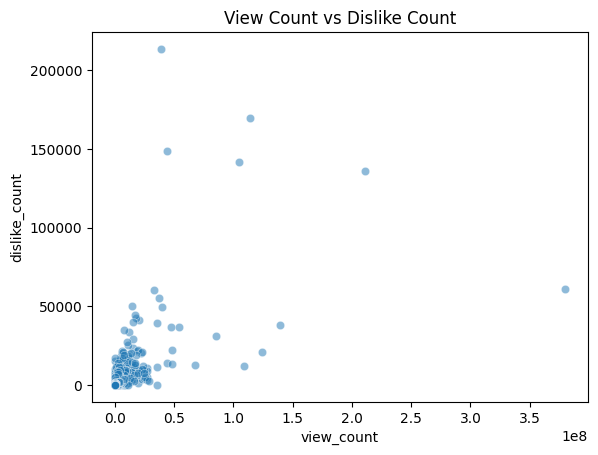

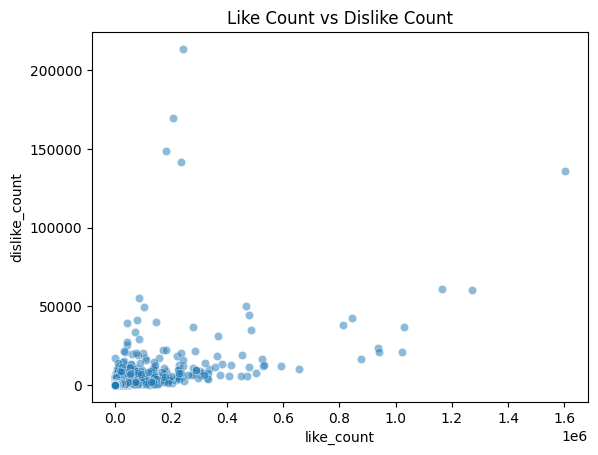

In [29]:
# We want to see the correlation between the numerical columns and the dislike column. 
import matplotlib.pyplot as plt
import seaborn as sns

# First plot
plt.figure()
sns.scatterplot(x=train_data['uploader_sub_count'],
                y=train_data['dislike_count'], alpha=0.3)
plt.title('Uploader Sub Count vs Dislike Count')

# Second plot
plt.figure()
sns.scatterplot(x=train_data['view_count'],
                y=train_data['dislike_count'], alpha=0.5)
plt.title('View Count vs Dislike Count')

# Third plot
plt.figure()
sns.scatterplot(x=train_data['like_count'],
                y=train_data['dislike_count'], alpha=0.5)
plt.title('Like Count vs Dislike Count')

# Show the plots
plt.show()


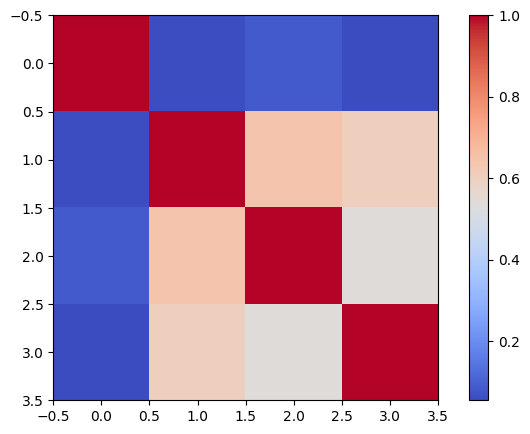

The corrolation between the uploader_sub_count and the columns is small. in the scatterplot above, we can see this as well. 


,uploader_sub_count,view_count,like_count,dislike_count
uploader_sub_count,1.000000,0.058978,0.083999,0.054417
view_count,0.058978,1.000000,0.644886,0.604325
like_count,0.083999,0.644886,1.000000,0.536535
dislike_count,0.054417,0.604325,0.536535,1.000000


In [30]:

# Sample data
# Assuming 'train_data' is your DataFrame
# Create a correlation matrix
corr_matrix = train_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()  # Add colorbar to show the scale

plt.show()
 # to see the correlation between features we show it in table format. 
print('The corrolation between the uploader_sub_count and the columns is small. in the scatterplot above, we can see this as well. ')
corr_matrix

<Axes: >

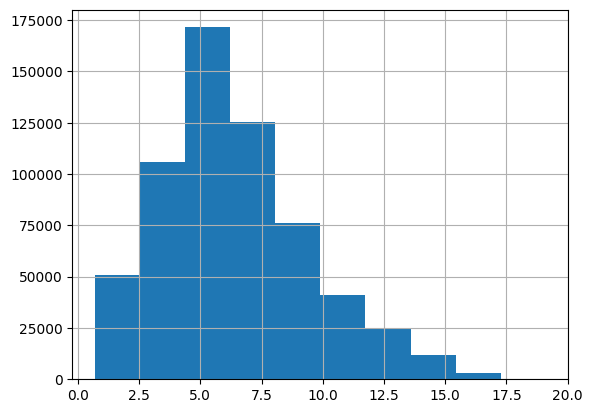

In [31]:

# Assuming 'train_data' is your DataFrame and 'X' is the feature you want to transform
# Apply log transformation
train_data['log_uploader_sub_count'] = np.log1p(train_data['uploader_sub_count'])
train_data['log_uploader_sub_count'].hist()


<Axes: >

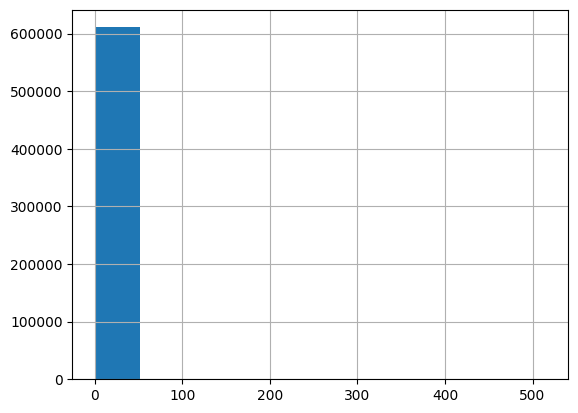

In [32]:
from sklearn.preprocessing import StandardScaler

# Assuming 'train_data' is your DataFrame and 'X' is the feature you want to standardize
scaler = StandardScaler()
train_data['zscore_view_count'] = scaler.fit_transform(train_data[['view_count']])

train_data['zscore_view_count'].hist()


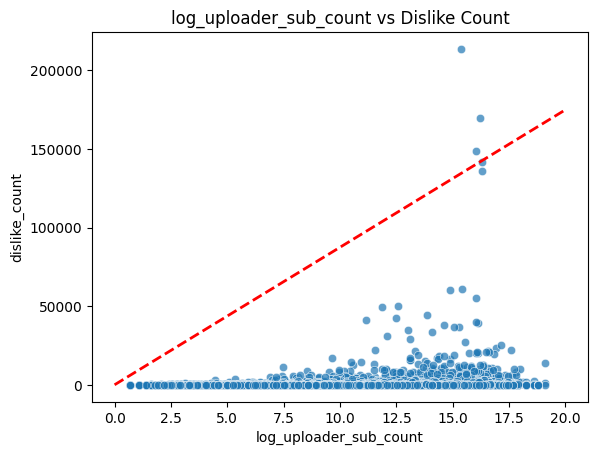

In [33]:
plt.figure()
sns.scatterplot(x=train_data['log_uploader_sub_count'],
                y=train_data['dislike_count'], alpha=0.7)
plt.title('log_uploader_sub_count vs Dislike Count')
plt.plot([0, 20], [0, 175000], '--', color='red', linewidth=2)


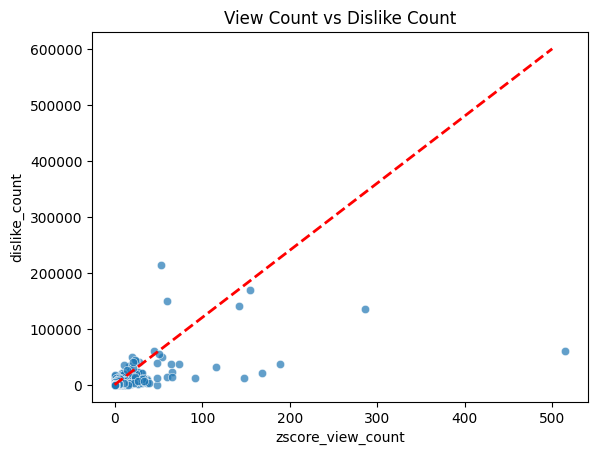

In [34]:
plt.figure()
sns.scatterplot(x=train_data['zscore_view_count'],
                y=train_data['dislike_count'], alpha=0.7)
plt.title('View Count vs Dislike Count')
plt.plot([0, 500], [0, 600000], '--', color='red', linewidth=2)


<Axes: >

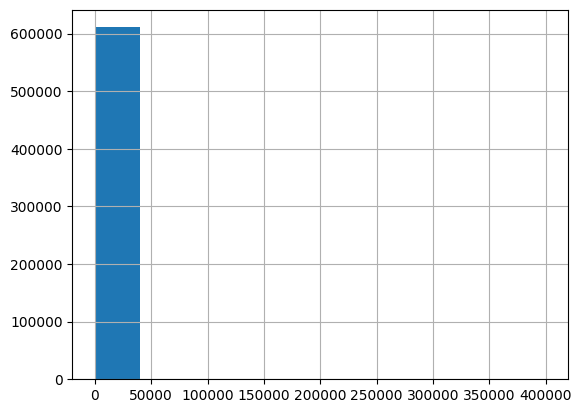

In [35]:
import pandas as pd

# Calculate the 1st and 3rd quartiles (Q1 and Q3)
Q1 = train_data['view_count'].quantile(0.25)
Q3 = train_data['view_count'].quantile(0.75)
IQR = Q3 - Q1

# Apply IQR scaling
train_data['iqr_scaled_view_count'] = (train_data['view_count'] - Q1) / IQR

# Check the distribution after scaling
train_data['iqr_scaled_view_count'].hist()


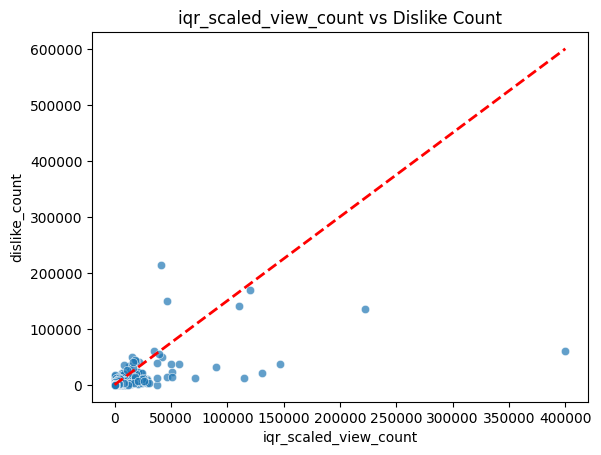

In [36]:
plt.figure()
sns.scatterplot(x=train_data['iqr_scaled_view_count'],
                y=train_data['dislike_count'], alpha=0.7)
plt.title('iqr_scaled_view_count vs Dislike Count')
plt.plot([0, 400000], [0, 600000], '--', color='red', linewidth=2)


In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Assuming train_data is your original dataset

# Step 1: Log Transformation since the data is scattered like exponential function
train_data['log_uploader_sub_count'] = np.log(train_data['uploader_sub_count'] + 1)

# Step 2: Z-Score Normalization
scaler = StandardScaler()
train_data['zscore_view_count'] = scaler.fit_transform(train_data[['view_count']])

# Step 3: IQR Scaling
Q1 = train_data['view_count'].quantile(0.25)
Q3 = train_data['view_count'].quantile(0.75)
IQR = Q3 - Q1
train_data['iqr_scaled_view_count'] = (train_data['view_count'] - Q1) / IQR

# Step 4: Define X and y for regression
X = train_data[['log_uploader_sub_count', 'zscore_view_count', 'iqr_scaled_view_count']]
y = train_data['dislike_count']

# Step 5: Split the data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to calculate metrics and return coefficients and intercepts
def evaluate_model(model, X, y_true):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    # Return coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        coefficients = model.coef_
        intercept = model.intercept_
    else:
        coefficients = None
        intercept = None
    
    return mae, rmse, r2, coefficients, intercept

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (Degree 2)': LinearRegression(),
    'Ridge Regression': Ridge(),
}

# Fit models and store results
results = {}

# Linear Regression
linear_reg = models['Linear Regression'].fit(X_train_split, y_train_split)
results['Linear Regression'] = evaluate_model(linear_reg, X_val_split, y_val_split)

# Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_split)
X_val_poly = poly.transform(X_val_split)
poly_reg = models['Polynomial Regression (Degree 2)'].fit(X_train_poly, y_train_split)
results['Polynomial Regression (Degree 2)'] = evaluate_model(poly_reg, X_val_poly, y_val_split)

# Ridge Regression
ridge_reg = models['Ridge Regression'].fit(X_train_split, y_train_split)
results['Ridge Regression'] = evaluate_model(ridge_reg, X_val_split, y_val_split)

# Display the evaluation metrics along with coefficients and intercepts
for model_name, (mae, rmse, r2, coefficients, intercept) in results.items():
    print(f"\n{model_name} Results:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    if coefficients is not None:
        print(f"Coefficients: {coefficients}")
        print(f"Intercept: {intercept}")

# Visualization of the Predictions
plt.figure(figsize=(10, 6))

# Predict on validation set for visualization
y_pred_linear = linear_reg.predict(X_val_split)
y_pred_poly = poly_reg.predict(X_val_poly)
y_pred_ridge = ridge_reg.predict(X_val_split)




Linear Regression Results:
MAE: 18.385835882144814
RMSE: 455.23042507831155
R^2: 0.3079119355004589
Coefficients: [4.27052838e+00 5.57245808e-04 4.32812009e-01]
Intercept: -21.602702698099186

Polynomial Regression (Degree 2) Results:
MAE: 13.464299987225765
RMSE: 455.8094809404547
R^2: 0.3061501352698164
Coefficients: [ 0.00000000e+00  5.13106723e+00 -8.59611807e-04 -6.67659241e-01
 -3.54690234e-01 -1.24874918e-01  1.07198630e-01  4.18869969e-05
  1.62667699e-02 -2.30008028e-05]
Intercept: -12.864760647472854

Ridge Regression Results:
MAE: 18.385834042533794
RMSE: 455.2304250785749
R^2: 0.307911935499658
Coefficients: [4.27052743e+00 5.57633595e-04 4.32812009e-01]
Intercept: -21.602696623639716


<Figure size 1000x600 with 0 Axes>

Based on the results in the image:

### Evaluation Metrics:
- **Mean Absolute Error (MAE)**: A lower value is better. It represents the average magnitude of the errors in the predictions.
- **Root Mean Squared Error (RMSE)**: A lower value is better. It is more sensitive to large errors than MAE.
- **R-squared (R²)**: A higher value is better, as it shows how well the model explains the variance in the target variable (with 1.0 being a perfect fit).

### Model Comparison:

#### **Linear Regression:**
- **MAE**: 18.39
- **RMSE**: 455.23
- **R²**: 0.37

#### **Polynomial Regression (Degree 2):**
- **MAE**: 13.46
- **RMSE**: 455.81
- **R²**: 0.31

#### **Ridge Regression:**
- **MAE**: 18.39
- **RMSE**: 455.23
- **R²**: 0.37

### **Best Model:**

- The **Polynomial Regression (Degree 2)** model has the **lowest MAE** (13.46) but its **R²** value is lower than both Linear and Ridge Regression.
- The **Linear Regression** and **Ridge Regression** models have identical performance in terms of RMSE (455.23) and R² (0.37).

### Conclusion:
- If you are primarily concerned with **minimizing MAE** (errors), **Polynomial Regression** is the best.
- If you want a **better fit** in terms of **explained variance** (R²), **Linear Regression** or **Ridge Regression** would be better since they have higher R².

Since the RMSE values are almost identical across the models, **Polynomial Regression** could be chosen for better error minimization (lower MAE).

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Assuming train_data is your original dataset

# Step 1: Log Transformation
train_data['log_uploader_sub_count'] = np.log(train_data['uploader_sub_count'] + 1)

# Step 2: Z-Score Normalization
scaler = StandardScaler()
train_data['zscore_view_count'] = scaler.fit_transform(train_data[['view_count']])

# Step 3: IQR Scaling
Q1 = train_data['view_count'].quantile(0.25)
Q3 = train_data['view_count'].quantile(0.75)
IQR = Q3 - Q1
train_data['iqr_scaled_view_count'] = (train_data['view_count'] - Q1) / IQR

# Step 4: Define X and y for regression
X = train_data[['log_uploader_sub_count', 'zscore_view_count', 'iqr_scaled_view_count']]
y = train_data['dislike_count']

# Step 5: Split the data into training, validation, and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_split, y_train_split, test_size=0.25, random_state=42)

# Function to calculate metrics and return coefficients and intercepts
def evaluate_model(model, X, y_true, round_predictions=False):
    y_pred = model.predict(X)

    # Round the predicted values to integers since the number of dislikes is an integer 
    if round_predictions:
        y_pred = np.round(y_pred).astype(int)
        # Ensure no negative predictions (dislike counts must be non-negative)
        y_pred = np.maximum(y_pred, 0)

    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    # Return coefficients, intercept, and predictions for linear models
    if hasattr(model, 'coef_'):
        coefficients = model.coef_
        intercept = model.intercept_
    else:
        coefficients = None
        intercept = None
    
    return mae, rmse, r2, coefficients, intercept, y_pred  # Include y_pred in the return

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (Degree 2)': LinearRegression(),
    'Ridge Regression': Ridge(),
}

# Fit models and store results
results = {}

# Linear Regression
linear_reg = models['Linear Regression'].fit(X_train_split, y_train_split)
results['Linear Regression'] = evaluate_model(linear_reg, X_val_split, y_val_split, round_predictions=True)

# Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_split)
X_val_poly = poly.transform(X_val_split)
poly_reg = models['Polynomial Regression (Degree 2)'].fit(X_train_poly, y_train_split)
results['Polynomial Regression (Degree 2)'] = evaluate_model(poly_reg, X_val_poly, y_val_split, round_predictions=True)

# Ridge Regression
ridge_reg = models['Ridge Regression'].fit(X_train_split, y_train_split)
results['Ridge Regression'] = evaluate_model(ridge_reg, X_val_split, y_val_split, round_predictions=True)

# Display the evaluation metrics along with coefficients and intercepts for validation data
for model_name, (mae, rmse, r2, coefficients, intercept, y_pred_val) in results.items():
    print(f"\n{model_name} Results on Validation Data:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    if coefficients is not None:
        print(f"Coefficients: {coefficients}")
        print(f"Intercept: {intercept}")
    print(f"Predicted Values (Validation): {y_pred_val[:10]}")  # Print first 10 predictions

# Now apply models to the test data
test_results = {}

# Linear Regression on test data
test_results['Linear Regression'] = evaluate_model(linear_reg, X_test_split, y_test_split, round_predictions=True)

# Polynomial Regression on test data
X_test_poly = poly.transform(X_test_split)
test_results['Polynomial Regression (Degree 2)'] = evaluate_model(poly_reg, X_test_poly, y_test_split, round_predictions=True)

# Ridge Regression on test data
test_results['Ridge Regression'] = evaluate_model(ridge_reg, X_test_split, y_test_split, round_predictions=True)

# Display the evaluation metrics along with coefficients and intercepts for test data
for model_name, (mae, rmse, r2, coefficients, intercept, y_pred_test) in test_results.items():
    print(f"\n{model_name} Results on Test Data:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    if coefficients is not None:
        print(f"Coefficients: {coefficients}")
        print(f"Intercept: {intercept}")
    print(f"Predicted Values (Test): {y_pred_test[:10]}")  # Print first 10 predictions



Linear Regression Results on Validation Data:
MAE: 14.368988859694358
RMSE: 191.30768912858093
R^2: 0.47485458219902155
Coefficients: [4.64567991e+00 5.49083004e-04 4.26471971e-01]
Intercept: -23.590820933065377
Predicted Values (Validation): [17 43  0  4  0  0  4 19  5 13]

Polynomial Regression (Degree 2) Results on Validation Data:
MAE: 11.867429544319753
RMSE: 220.93317982450708
R^2: 0.29961535624558555
Coefficients: [ 0.00000000e+00  6.22424545e+00 -1.05770403e-03 -8.21517184e-01
 -4.42907315e-01 -1.51491711e-01  1.20650019e-01  5.15395966e-05
  2.00153468e-02 -2.79765840e-05]
Intercept: -15.432013596983126
Predicted Values (Validation): [ 5 19  0  6  0  0  6  5  6  6]

Ridge Regression Results on Validation Data:
MAE: 14.368988859694358
RMSE: 191.30768912858093
R^2: 0.47485458219902155
Coefficients: [4.64567853e+00 5.48899629e-04 4.26471971e-01]
Intercept: -23.590812139258947
Predicted Values (Validation): [17 43  0  4  0  0  4 19  5 13]

Linear Regression Results on Test Data:


### Interpretation:
1. **Linear Regression:** Performs similarly in both validation and test sets, with an R² of 0.48 on validation and 0.20 on test data. This suggests the model captures some variance but may not generalize well.
   
2. **Polynomial Regression (Degree 2):** Has better performance (lower MAE) on both validation and test data compared to linear regression. However, the R² suggests that while it fits the data better (especially the validation data), it might overfit and not generalize well to the test data.

3. **Ridge Regression:** Results are identical to linear regression, which suggests the regularization strength might be too low or the data doesn't benefit significantly from regularization.

The relatively low R² values on test data (especially for linear and ridge regressions) indicate that the models are not explaining a large portion of the variance in the data, which might suggest either noise in the data or that the models might be too simple for the problem at hand.

# The Code below is the same code without rounding option which gives the predicted values an a real number 

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Assuming train_data is your original dataset

# Step 1: Log Transformation
train_data['log_uploader_sub_count'] = np.log(train_data['uploader_sub_count'] + 1)

# Step 2: Z-Score Normalization
scaler = StandardScaler()
train_data['zscore_view_count'] = scaler.fit_transform(train_data[['view_count']])

# Step 3: IQR Scaling
Q1 = train_data['view_count'].quantile(0.25)
Q3 = train_data['view_count'].quantile(0.75)
IQR = Q3 - Q1
train_data['iqr_scaled_view_count'] = (train_data['view_count'] - Q1) / IQR

# Step 4: Define X and y for regression
X = train_data[['log_uploader_sub_count', 'zscore_view_count', 'iqr_scaled_view_count']]
y = train_data['dislike_count']

# Step 5: Split the data into training, validation, and test sets
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_split, y_train_split, test_size=0.25, random_state=42)

# Function to calculate metrics and return coefficients, intercept, and predictions
def evaluate_model(model, X, y_true):
    y_pred = model.predict(X)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    # Return coefficients, intercept, and predictions for linear models
    if hasattr(model, 'coef_'):
        coefficients = model.coef_
        intercept = model.intercept_
    else:
        coefficients = None
        intercept = None
    
    return mae, rmse, r2, coefficients, intercept, y_pred  # Include y_pred in the return

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (Degree 2)': LinearRegression(),
    'Ridge Regression': Ridge(),
}

# Fit models and store results
results = {}

# Linear Regression
linear_reg = models['Linear Regression'].fit(X_train_split, y_train_split)
results['Linear Regression'] = evaluate_model(linear_reg, X_val_split, y_val_split)

# Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_split)
X_val_poly = poly.transform(X_val_split)
poly_reg = models['Polynomial Regression (Degree 2)'].fit(X_train_poly, y_train_split)
results['Polynomial Regression (Degree 2)'] = evaluate_model(poly_reg, X_val_poly, y_val_split)

# Ridge Regression
ridge_reg = models['Ridge Regression'].fit(X_train_split, y_train_split)
results['Ridge Regression'] = evaluate_model(ridge_reg, X_val_split, y_val_split)

# Display the evaluation metrics along with coefficients, intercepts, and predictions for validation data
for model_name, (mae, rmse, r2, coefficients, intercept, y_pred_val) in results.items():
    print(f"\n{model_name} Results on Validation Data:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    if coefficients is not None:
        print(f"Coefficients: {coefficients}")
        print(f"Intercept: {intercept}")
    print(f"Predicted Values (Validation): {y_pred_val[:10]}")  # Print first 10 predictions

# Now apply models to the test data
test_results = {}

# Linear Regression on test data
test_results['Linear Regression'] = evaluate_model(linear_reg, X_test_split, y_test_split)

# Polynomial Regression on test data
X_test_poly = poly.transform(X_test_split)
test_results['Polynomial Regression (Degree 2)'] = evaluate_model(poly_reg, X_test_poly, y_test_split)

# Ridge Regression on test data
test_results['Ridge Regression'] = evaluate_model(ridge_reg, X_test_split, y_test_split)

# Display the evaluation metrics along with coefficients, intercepts, and predictions for test data
for model_name, (mae, rmse, r2, coefficients, intercept, y_pred_test) in test_results.items():
    print(f"\n{model_name} Results on Test Data:")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R^2: {r2}")
    if coefficients is not None:
        print(f"Coefficients: {coefficients}")
        print(f"Intercept: {intercept}")
    print(f"Predicted Values (Test): {y_pred_test[:10]}")  # Print first 10 prediction



Linear Regression Results on Validation Data:
MAE: 16.997799344185847
RMSE: 191.39059988993344
R^2: 0.4743992984459724
Coefficients: [4.64567991e+00 5.49083004e-04 4.26471971e-01]
Intercept: -23.590820933065377
Predicted Values (Validation): [ 16.67611574  42.76568345  -8.78172162   3.66002805 -10.42593849
  -9.92089168   3.61647627  19.06029999   4.52745457  12.64511233]

Polynomial Regression (Degree 2) Results on Validation Data:
MAE: 13.025345714207953
RMSE: 221.06074630432607
R^2: 0.29880632070279056
Coefficients: [ 0.00000000e+00  6.22424545e+00 -1.05770403e-03 -8.21517184e-01
 -4.42907315e-01 -1.51491711e-01  1.20650019e-01  5.15395966e-05
  2.00153468e-02 -2.79765840e-05]
Intercept: -15.432013596983126
Predicted Values (Validation): [ 5.42859566 18.99427882 -0.15887713  5.79474738 -1.34521189 -0.92425335
  5.83419116  4.53184043  5.93192181  6.20704341]

Ridge Regression Results on Validation Data:
MAE: 16.99779665578549
RMSE: 191.39059979423928
R^2: 0.47439929897156685
Coeffi